# Beijing Air Quality

## Modeling - ARIMA MODEL

### Import packages and data

In [11]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
import pandas as pd
import numpy as np
from pmdarima import auto_arima    # for determining ARIMA orders
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
%matplotlib inline
# Ignore harmless warnings
warnings.filterwarnings("ignore")
df = pd.read_pickle('PKL/full.pkl')

### Check the auto correlation and partial auto correlation

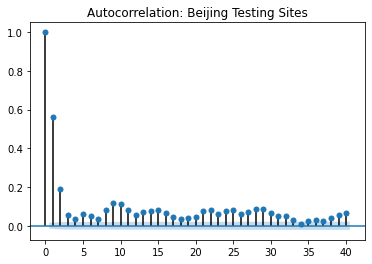

In [12]:
title = 'Autocorrelation: Beijing Testing Sites'
lags = 40
plot_acf(df['PM2.5'],title=title,lags=lags);

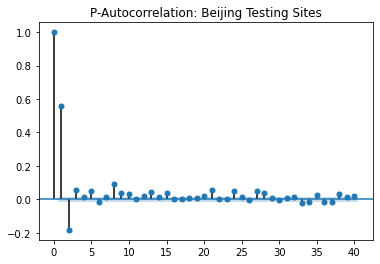

In [46]:
title = 'P-Autocorrelation: Beijing Testing Sites'
lags = 40
plot_pacf((df['PM2.5']),title=title,lags=lags);

### Load in the train and test sets

In [43]:
test = pd.read_pickle('PKL/test.pkl')
train = pd.read_pickle('PKL/train.pkl')


### Use Auto ARIMA to find the best parameters for the ARIMA model

In [44]:
auto_arima(train['PM2.5'],seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                13452
Model:               SARIMAX(3, 0, 3)   Log Likelihood              -64170.034
Date:                Thu, 10 Sep 2020   AIC                         128356.068
Time:                        16:44:12   BIC                         128416.123
Sample:                             0   HQIC                        128376.101
                              - 13452                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6825      0.107      6.382      0.000       0.473       0.892
ar.L1          1.5022      0.127     11.819      0.000       1.253       1.751
ar.L2         -0.1798      0.247     -0.728      0.467      -0.664       0.304
ar.L3         -0.3309      0.121     -2.734      0.006      -0.568      -0.094
ma.L1         -0.9089      0.127     -7.141      0.000      -1.158      -0.659
ma.L2         -0.1541      0.172     -0.898      0.369      -0.490       0.182
ma.L3          0.1689      0.047      3.561      0.000       0.076       0.262
sigma2       803.9400      3.501    229.649      0.000     797.079     810.801
===================================================================================
Ljung-Box (Q):                      358.54   Jarque-Bera (JB):            271359.17
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.32
Prob(H) (two-sided):                  0.95   Kurtosis:                        24.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
stepwise_fit = auto_arima(train['PM2.5'], start_p=0, start_q=0,
                         max_p=1, max_q=1, m=12,
                         seasonal=True,
                         d=None, trace=True,
                         error_action='ignore',   # we don't want to know if an order does not work
                         suppress_warnings=True,  # we don't want convergence warnings
                         stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=147356.253, Time=19.54 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=152248.397, Time=0.22 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=129840.070, Time=8.30 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=140073.046, Time=14.01 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=163790.563, Time=1.08 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=129846.276, Time=0.62 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=129772.286, Time=47.22 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=129749.209, Time=116.48 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=129822.028, Time=24.91 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=129749.642, Time=64.44 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=129752.703, Time=74.14 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=147473.194, Time=87.69 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=128186.252, Time=101.14 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=128399

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                13452
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 12)   Log Likelihood              -64086.126
Date:                            Thu, 10 Sep 2020   AIC                         128186.252
Time:                                    17:01:18   BIC                         128238.800
Sample:                                         0   HQIC                        128203.780
                                          - 13452                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4712      0.182      8.084      0.000       1.115       1.828
ar.L1          0.9688      0.002    569.090      0.000       0.966       0.972
ma.L1         -0.3841      0.004    -98.041      0.000      -0.392      -0.376
ar.S.L12       0.5298      0.028     19.204      0.000       0.476       0.584
ar.S.L24      -0.1150      0.005    -25.421      0.000      -0.124      -0.106
ma.S.L12      -0.5392      0.028    -19.560      0.000      -0.593      -0.485
sigma2       804.3835      3.359    239.490      0.000     797.800     810.966
===================================================================================
Ljung-Box (Q):                      221.45   Jarque-Bera (JB):            264577.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.23
Prob(H) (two-sided):                  0.70   Kurtosis:                        24.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
model_PM = ARIMA(train['PM2.5'],order=(2,0,1))
results = model_PM.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  PM2.5   No. Observations:                13452
Model:                     ARMA(2, 1)   Log Likelihood              -64205.891
Method:                       css-mle   S.D. of innovations             28.616
Date:                Thu, 10 Sep 2020   AIC                         128421.782
Time:                        17:03:23   BIC                         128459.317
Sample:                             0   HQIC                        128434.302
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          80.6441      4.155     19.409      0.000      72.501      88.788
ar.L1.PM2.5     0.9382      0.022     42.317      0.000       0.895       0.982
ar.L2.PM2.5     0.0228      0.021      1.104      0.270      -0.018       0.063
ma.L1.PM2.5    -0.3425      0.021    -16.640      0.000      -0.383      -0.302
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0396           +0.0000j            1.0396            0.0000
AR.2          -42.1491           +0.0000j           42.1491            0.5000
MA.1            2.9194           +0.0000j            2.9194            0.0000
-----------------------------------------------------------------------------
"""

In [52]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['PM2.5'], predictions_PM)
print(f'ARIMA(2,2,0) MSE Error: {error:18}')

from statsmodels.tools.eval_measures import rmse

error = rmse(test['PM2.5'], predictions_PM)
print(f'ARIMA(2,2,0) RMSE Error: {error:18}')

ARIMA(2,2,0) MSE Error:  3761.176970735768
ARIMA(2,2,0) RMSE Error:  61.32843525425843


In [54]:
test['PM2.5'].mean()

72.8535936301604

In [55]:
df = pd.read_pickle('PKL/full.pkl')

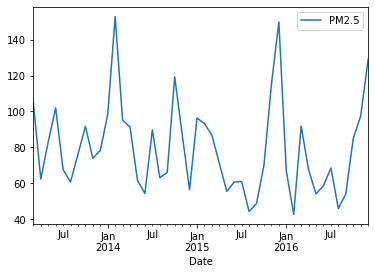

In [57]:
fig, ax = plt.subplots()
df.resample('M').mean().plot()